<a href="https://colab.research.google.com/github/ralphbacor-creator/Bacor-simu./blob/main/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

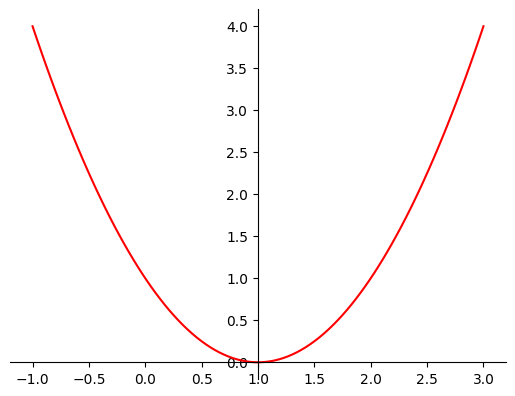

Number of iterations =  1 
Actual value of x  is =  2.96
Number of iterations =  2 
Actual value of x  is =  2.9208
Number of iterations =  3 
Actual value of x  is =  2.882384
Number of iterations =  4 
Actual value of x  is =  2.84473632
Number of iterations =  5 
Actual value of x  is =  2.8078415936
Number of iterations =  6 
Actual value of x  is =  2.7716847617280003
Number of iterations =  7 
Actual value of x  is =  2.7362510664934403
Number of iterations =  8 
Actual value of x  is =  2.7015260451635714
Number of iterations =  9 
Actual value of x  is =  2.6674955242603
Number of iterations =  10 
Actual value of x  is =  2.6341456137750936
Number of iterations =  11 
Actual value of x  is =  2.601462701499592
Number of iterations =  12 
Actual value of x  is =  2.5694334474696
Number of iterations =  13 
Actual value of x  is =  2.538044778520208
Number of iterations =  14 
Actual value of x  is =  2.507283882949804
Number of iterations =  15 
Actual value of x  is =  2.47713

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,3,100)
y=x**2-2*x+1

fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')

plt.plot(x,y, 'r')
plt.show()

Gradf = lambda x: 2*x-2

ActualX = 3
LearningRate = 0.01
PrecisionValue = 0.000001
PreviousStepSize = 1
MaxIteration = 10000
IterationCounter = 0


while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration:
    PreviousX = ActualX
    ActualX = ActualX - LearningRate * Gradf(PreviousX)
    PreviousStepSize = abs(ActualX - PreviousX)
    IterationCounter = IterationCounter+1
    print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ",ActualX)

print("X value of f(x) minimum = ", ActualX)


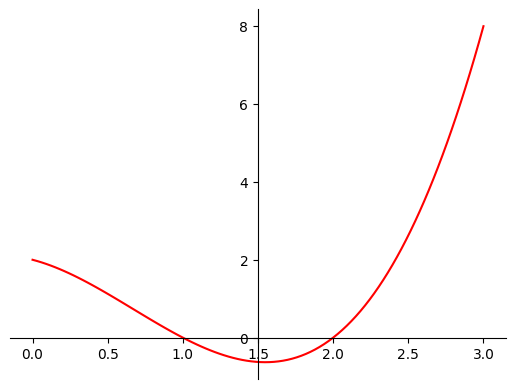

Value of x at the minimum of the function 1.5454545454545454
Number of iterations =  1 
Actual value of x  is =  2.0
Number of iterations =  2 
Actual value of x  is =  1.625
Number of iterations =  3 
Actual value of x  is =  1.5516304347826086
Number of iterations =  4 
Actual value of x  is =  1.5485890147300967
Number of iterations =  5 
Actual value of x  is =  1.5485837703704566
Number of iterations =  6 
Actual value of x  is =  1.5485837703548635
X value of f(x) minimum =  1.5485837703548635


In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,3,100)
y=x**3 -2*x**2 -x + 2

fig = plt.figure()
axdef = fig.add_subplot(1, 1, 1)
axdef.spines['left'].set_position('center')
axdef.spines['bottom'].set_position('zero')
axdef.spines['right'].set_color('none')
axdef.spines['top'].set_color('none')
axdef.xaxis.set_ticks_position('bottom')
axdef.yaxis.set_ticks_position('left')

plt.plot(x,y, 'r')
plt.show()

print('Value of x at the minimum of the function', x[np.argmin(y)])

FirstDerivative = lambda x: 3*x**2-4*x -1
SecondDerivative = lambda x: 6*x-4

ActualX = 3
PrecisionValue = 0.000001
PreviousStepSize = 1
MaxIteration = 10000
IterationCounter = 0


while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration:
    PreviousX = ActualX
    ActualX = ActualX - FirstDerivative(PreviousX)/ SecondDerivative(PreviousX)
    PreviousStepSize = abs(ActualX - PreviousX)
    IterationCounter = IterationCounter+1
    print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ",ActualX)

print("X value of f(x) minimum = ", ActualX)

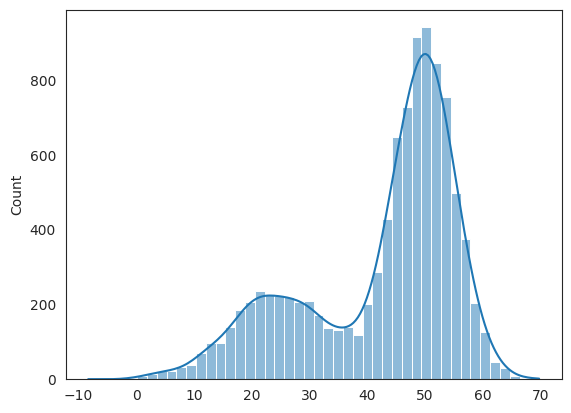

Initial distribution means = (25, 50)
Initial distribution standard deviation = (9, 5)
GM_model distribution means = [[49.85548907]
 [24.18519465]]
GM_model distribution standard deviation = [[[5.22945769]]

 [[8.25811184]]]


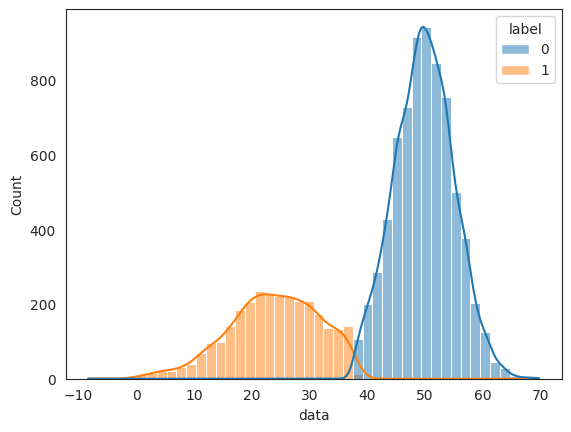

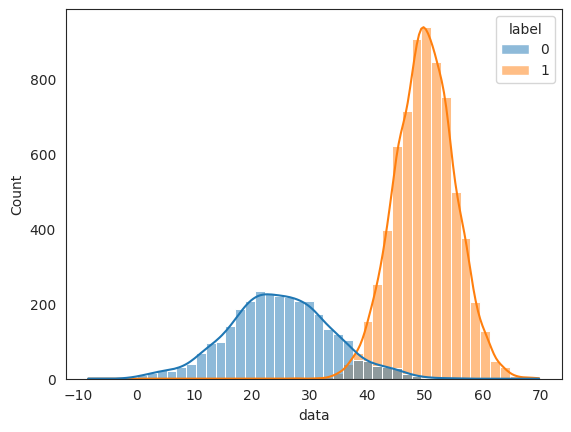

In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd

mean_1=25
st_1=9
mean_2=50
st_2=5

n_dist_1 = np.random.normal(loc=mean_1, scale=st_1, size=3000)
n_dist_2 = np.random.normal(loc=mean_2, scale=st_2, size=7000)

dist_merged = np.hstack((n_dist_1, n_dist_2))

sns.set_style("white")
sns.histplot(data=dist_merged, kde=True)
plt.show()

dist_merged_res = dist_merged.reshape((len(dist_merged), 1))
gm_model = GaussianMixture(n_components=2, init_params='kmeans')
gm_model.fit(dist_merged_res)

print(f"Initial distribution means = {mean_1,mean_2}")
print(f"Initial distribution standard deviation = {st_1,st_2}")

print(f"GM_model distribution means = {gm_model.means_}")
print(f"GM_model distribution standard deviation = {np.sqrt(gm_model.covariances_)}")

dist_labels = gm_model.predict(dist_merged_res)

sns.set_style("white")
data_pred=pd.DataFrame({'data':dist_merged, 'label':dist_labels})
sns.histplot(data = data_pred, x = "data", kde = True, hue = "label")
plt.show()

label_0 = np.zeros(3000, dtype=int)
label_1 = np.ones(7000, dtype=int)
labels_merged = np.hstack((label_0, label_1))
data_init=pd.DataFrame({'data':dist_merged, 'label':labels_merged})

sns.set_style("white")
sns.histplot(data = data_init, x = "data", kde = True, hue = "label")
plt.show()
